<a href="https://colab.research.google.com/github/gmansilla1508/gmansilla1508/blob/main/Trabajopractico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabajo Final:** Análisi de Datos Científicos y Geográficos

**Alumnos:**
Maria Florencia Piñeyro
Leonardo Jofre
Guillermo Mansilla

De acuerdo a las opciones enunciadas para hacer el trabajo práctico hemos seleccionado la siguiente:

**Sobre los dados de MNIST, intenten luego de clusterizar armar un clasificador**

Como primer punto lo que se realizo fue importar las librerías tanto para clusterizar, donde se incorporaron otras librerias mas alla de las definidas en el enunciado descripto en *mnist_clustering.py*; en pos de analizar si hay mejoras en la clusterización.

In [6]:
pip install colorspacious

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans, MiniBatchKMeans
import random
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.cluster import spectral_clustering
from sklearn.cluster import AgglomerativeClustering
from colorspacious import cspace_converter


Luego lo que hemos realizado fue la carga y el analisis exploratorio del dataset que utilizaremos, con el objetivo de entender las dimensiones del dataset y vector como también ver las imágenes que contiene este dataset.


 Dimensiones del dataset:

(1797, 64)

 Dimensiones del vector solución:

(1797,)

 Cantidad de imágenes de cada dígito:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))
[[ 0.  0.  0.  8. 15.  1.  0.  0.]
 [ 0.  0.  1. 14. 13.  1.  1.  0.]
 [ 0.  0. 10. 15.  3. 15. 11.  0.]
 [ 0.  7. 16.  7.  1. 16.  8.  0.]
 [ 0.  9. 16. 13. 14. 16.  5.  0.]
 [ 0.  1. 10. 15. 16. 14.  0.  0.]
 [ 0.  0.  0.  1. 16. 10.  0.  0.]
 [ 0.  0.  0. 10. 15.  4.  0.  0.]]
4


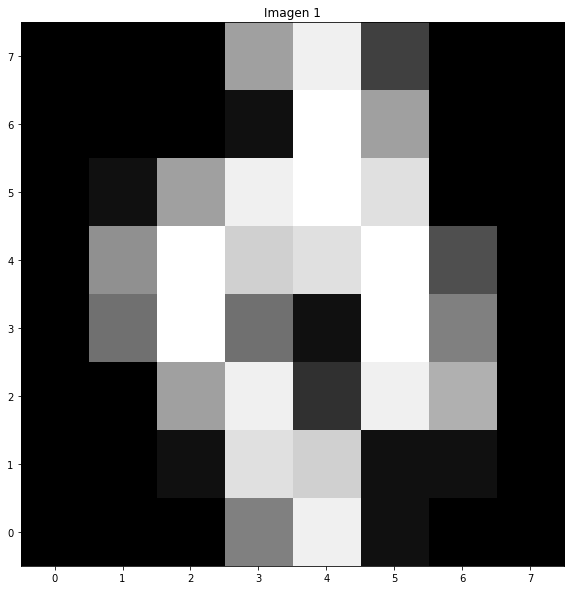

[[255. 255. 255. 247. 240. 254. 255. 255.]
 [255. 255. 254. 241. 242. 254. 254. 255.]
 [255. 255. 245. 240. 252. 240. 244. 255.]
 [255. 248. 239. 248. 254. 239. 247. 255.]
 [255. 246. 239. 242. 241. 239. 250. 255.]
 [255. 254. 245. 240. 239. 241. 255. 255.]
 [255. 255. 255. 254. 239. 245. 255. 255.]
 [255. 255. 255. 245. 240. 251. 255. 255.]]


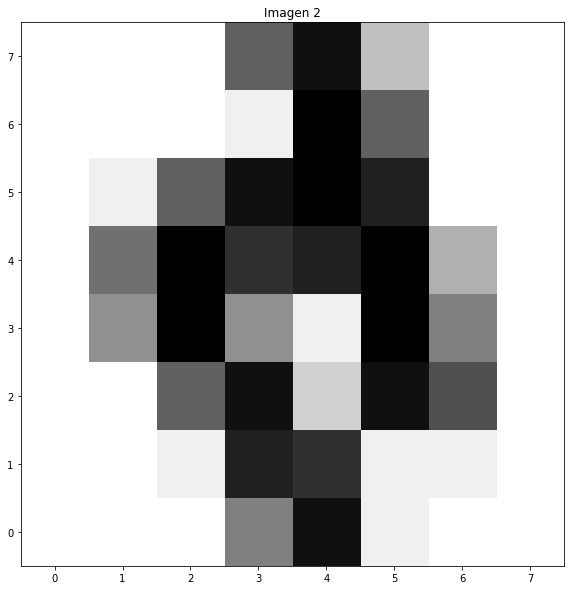

[[255. 255. 255. 243. 242. 250. 255. 255.]
 [255. 255. 255. 244. 239. 246. 255. 255.]
 [255. 255. 252. 240. 239. 249. 255. 255.]
 [255. 248. 240. 239. 239. 253. 255. 255.]
 [255. 255. 254. 239. 239. 252. 255. 255.]
 [255. 255. 254. 239. 239. 249. 255. 255.]
 [255. 255. 254. 239. 239. 249. 255. 255.]
 [255. 255. 255. 244. 239. 245. 255. 255.]]


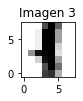

In [8]:
X,y= load_digits(return_X_y=True)
print("\n Dimensiones del dataset:\n")
print(X.shape)
print("\n Dimensiones del vector solución:\n")
print(y.shape)
print("\n Cantidad de imágenes de cada dígito:\n")
print(np.unique(y,return_counts=True)) 
imagen=X[14,:].reshape(8,8) 
print(imagen)
print(y[14])
plt.figure(figsize=(10,10))
plt.imshow(imagen,cmap=plt.cm.gray)
plt.title("Imagen 1")
plt.gca().invert_yaxis()
plt.show()
X=255-X 
imagen2=X[14,:].reshape(8,8) 
print(imagen2)
plt.figure(figsize=(10,10))
plt.imshow(imagen2,cmap=plt.cm.gray)
plt.title("Imagen 2")
plt.gca().invert_yaxis()
plt.show()
imagen3=X[1,:].reshape(8,8) 
print(imagen3)
plt.figure(figsize=(1,1))
plt.imshow(imagen3,cmap=plt.cm.gray)
plt.title("Imagen 3")
plt.gca().invert_yaxis()
plt.show()

En los pasos siguientes realizamos diferentes clusterizaciones del dataset, incorporando semilla para poder replicar el experimiento y obteniendo el coeficiente de Silhouette

In [ ]:
random.seed(182309)
np.random.seed(182309)
modelo=KMeans(n_clusters=10,init='random').fit(X) 
resultado=modelo.predict(X) 
print("\n Imprimimos algunos parámetros del modelo:\n")
print("\n Cantidad de clusters: {}\n".format(modelo.n_clusters))
print("Coeficioente de Silhouette: %0.3f" % metrics.silhouette_score(X,resultado))
print("\n Centros de cada uno de los clusters: {}\n".format(modelo.cluster_centers_))
print("Grupo al cual pertenece cada una de las imágenes:\n {}".format(resultado))

In [ ]:
imagen_prueba=modelo.cluster_centers_[3,:].reshape(8,8)
plt.imshow(imagen_prueba,cmap=plt.cm.plasma)
plt.title("Imagen de prueba del centro del cluster n°3")
plt.gca().invert_yaxis()
plt.show() 
for i in range(0,10):
    indicador = np.where(resultado==i)[0] 
    Cantidad = indicador.shape[0]      
    altura = np.floor(Cantidad/10.)     
    plt.figure(figsize=(10,10))
    for j in range(0, Cantidad):
        plt.subplot(altura+1, 10, j+1)
        imagen = X[indicador[j], ]
        imagen = imagen.reshape(8, 8)
        plt.imshow(imagen, cmap=plt.cm.plasma)
        plt.axis('off')
    plt.suptitle("Cluster N°{}: {} imágenes".format(i,Cantidad),size=15)
    plt.show()

Hay algunos cluster que con el metodo de Kmeans no separanb bien las clases. Hay grupos que se pueden ver que aparece 2, 3 y 4 digitos diferentes. Con lo cual usar este modelo no serviera para hacer reconocimiento por imágenes de diferentes digitos. Por lo tanto lo que se realizara a continuación sera la de probar otro modelo de cluster o bien probar el mismo con diferentes parámetros. Por lo tanto, lo que se va a realizar es replicar las pruebas del último bloque de código pero adaptado a otros modelos. A continuación se define la funcion de impresión de clusters y se probará la misma.

In [ ]:
def cluster_imagen(result,XX):
    for i in range(0,10):
        indicador = np.where(result==i)[0] 
        Cantidad = indicador.shape[0]      
        altura = np.floor(Cantidad/10.)     
        plt.figure(figsize=(10,10))
        for j in range(0, Cantidad):
            plt.subplot(altura+1, 10, j+1)
            imagen = XX[indicador[j], ]
            imagen = imagen.reshape(8, 8)
            plt.imshow(imagen, cmap=plt.cm.plasma)
            plt.axis('off')
        plt.suptitle("Cluster N°{}: {} imágenes".format(i,Cantidad),size=15)
        plt.show()


cluster_imagen(resultado,X)

A continuación se ejecutará el modelo de cluster Kmeans pero con un cambio en su inicialización " k-means++ "

In [ ]:
modelo2=KMeans(n_clusters=10,init='k-means++').fit(X)
resultado2=modelo2.predict(X) 
cluster_imagen(resultado2,X) 

In [25]:
modelo3=KMeans(
    init="k-means++",
    n_clusters=10,
 
    n_init=10,
    max_no_improvement=10,
    verbose=0,
)

resultado3=modelo3.predict(X) 
cluster_imagen(resultado3,X) 

NotFittedError: ignored

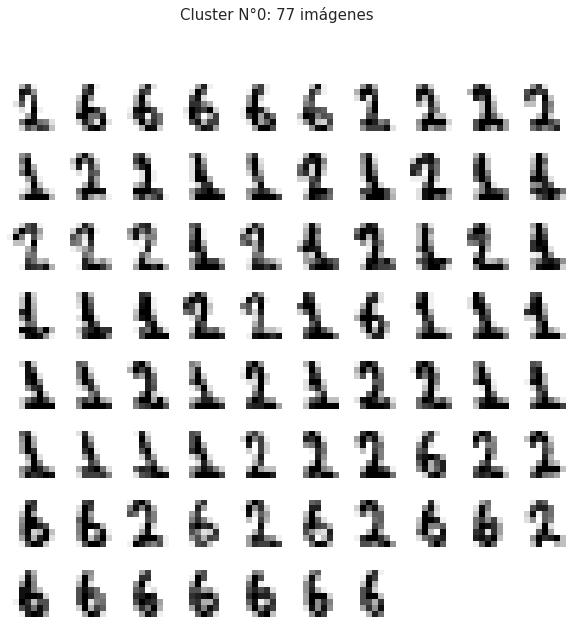

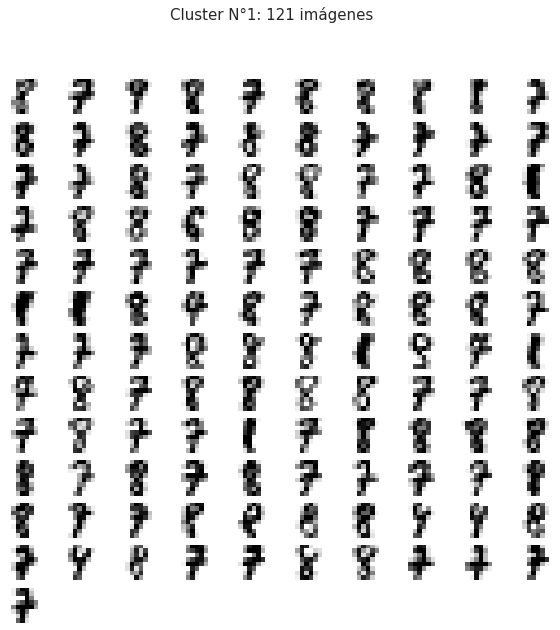

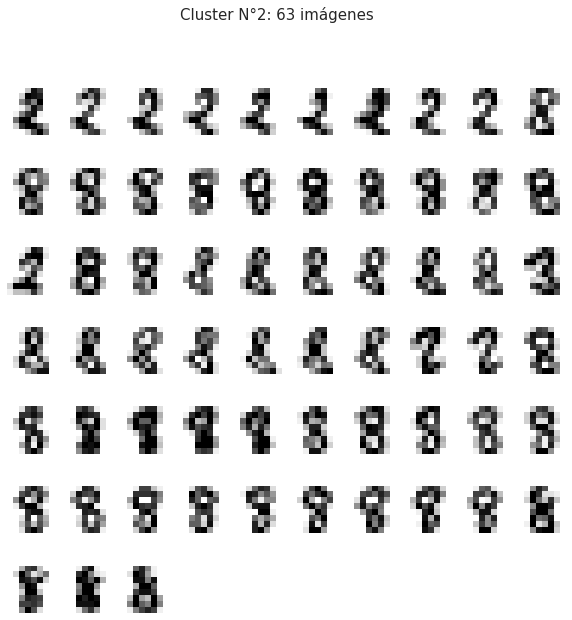

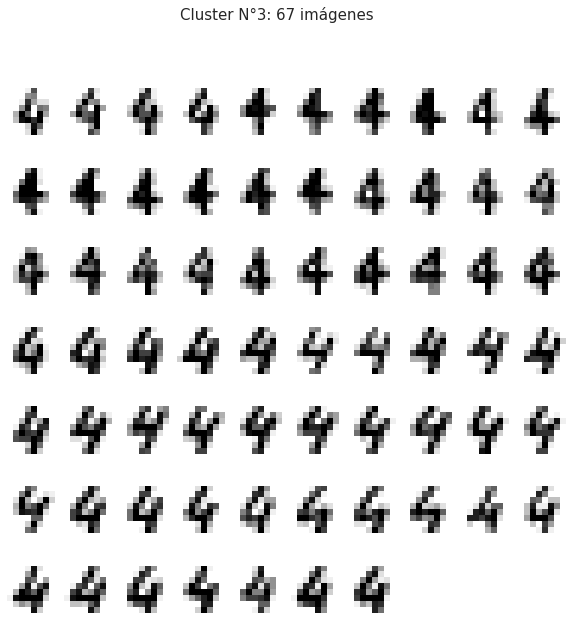

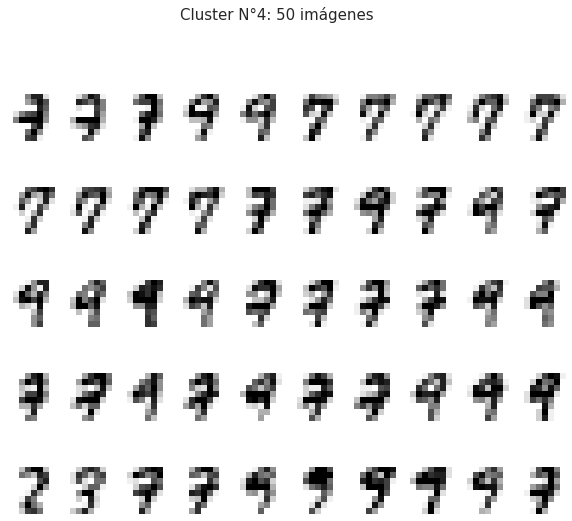

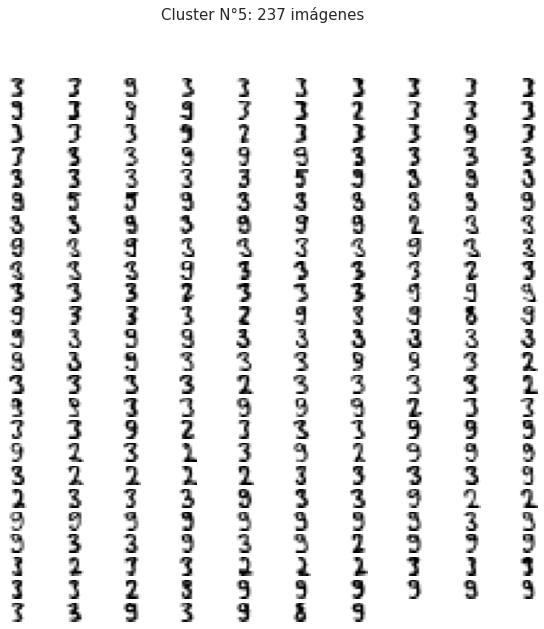

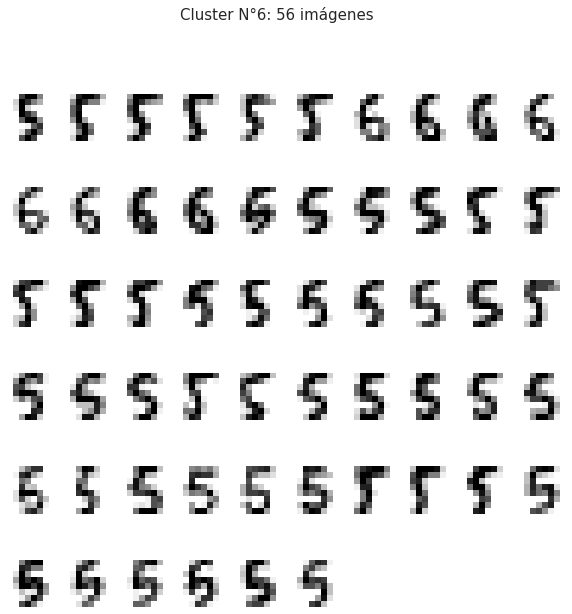

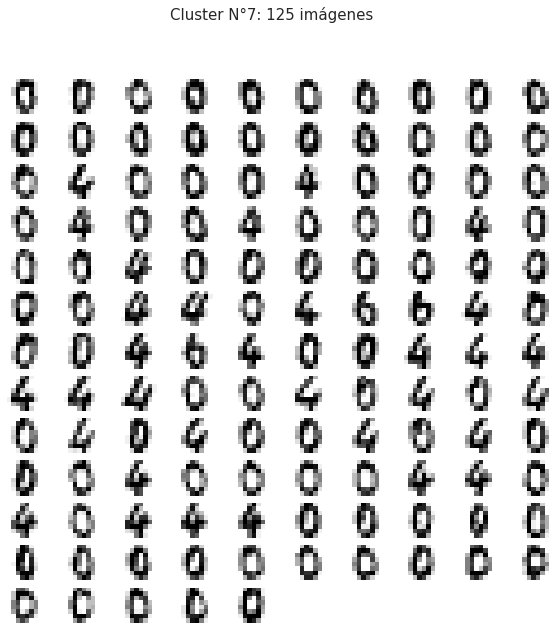

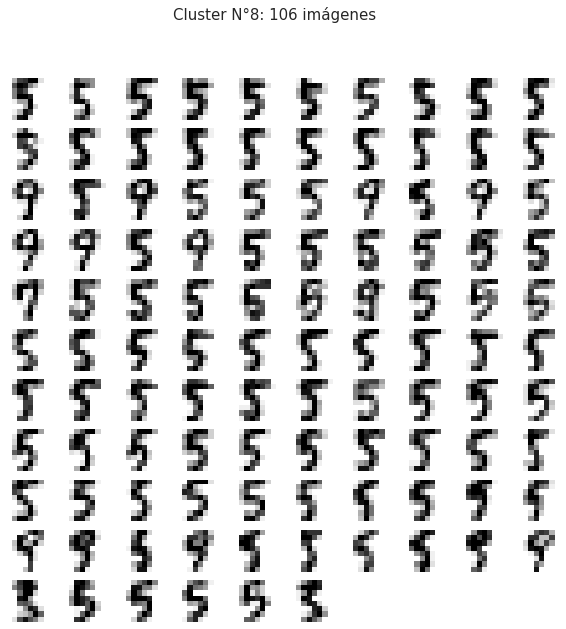

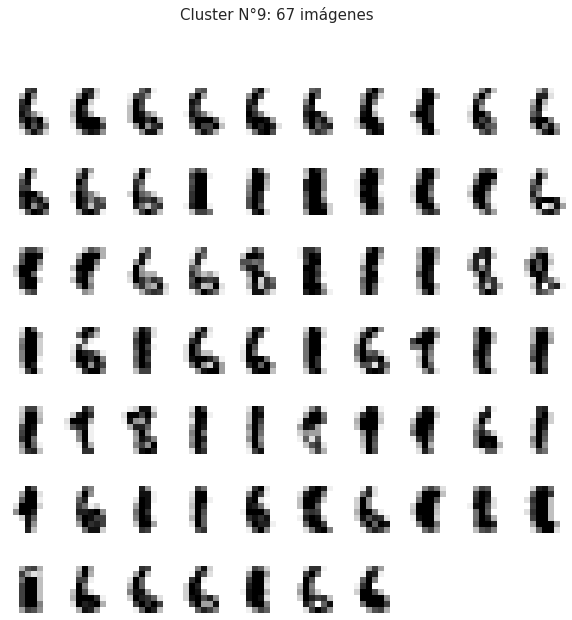


 Imprimimos algunos parámetros del modelo:


 Cantidad de clusters: 10

Coeficioente de Silhouette: 0.182

 Centros de cada uno de los clusters: [[255.         255.         253.84065934 243.77472527 245.46703297
  253.58241758 254.99450549 255.         255.         254.93956044
  247.81868132 240.43956044 248.80769231 254.17032967 254.97252747
  255.         255.         254.23076923 242.54395604 245.52747253
  254.06593407 254.89010989 255.         255.         255.
  252.7032967  241.37912088 246.90659341 251.12637363 253.07142857
  254.8956044  255.         255.         251.47252747 240.32417582
  242.08241758 242.74725275 244.71428571 252.28021978 255.
  255.         253.13186813 240.48351648 244.34615385 249.42307692
  244.80769231 245.86813187 254.76923077 255.         254.82417582
  244.71428571 242.37362637 249.58241758 243.67582418 244.1043956
  254.37362637 255.         255.         253.55494505 244.26373626
  239.9010989  241.86813187 250.37912088 254.82967033]
 [255.      

In [ ]:
random.seed(0)
np.random.seed(0)
modelo4= AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='complete')
resultado4=modelo4.fit_predict(X)
cluster_imagen(resultado4,X)
print("\n Imprimimos algunos parámetros del modelo:\n")
print("\n Cantidad de clusters: {}\n".format(modelo.n_clusters))
print("Coeficioente de Silhouette: %0.3f" % metrics.silhouette_score(X,resultado))
print("\n Centros de cada uno de los clusters: {}\n".format(modelo.cluster_centers_))
print("Grupo al cual pertenece cada una de las imágenes:\n {}".format(resultado))


In [ ]:
#Importamos las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import random
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.cluster import spectral_clustering
from sklearn.cluster import AgglomerativeClustering

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


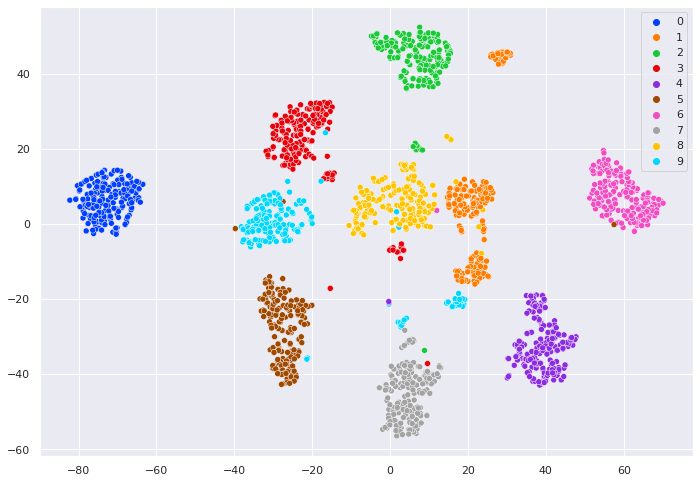

In [ ]:
import numpy as np
from sklearn.datasets import load_digits

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

from scipy.spatial.distance import pdist
from scipy import linalg
from scipy.spatial.distance import squareform

from matplotlib import pyplot as plt

import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

X, y = load_digits(return_X_y=True)

tsne = TSNE()
 
X_embedded = tsne.fit_transform(X)

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

plt.show()

# Clasificador de Mnist, con y sin t-SNE

In [ ]:
# Horrible fix para evitar warnings causados por diferentes versiones de np y tensorflow
# https://github.com/tensorflow/tensorflow/issues/30427
import warnings
warnings.filterwarnings('ignore')

from time import time

seed = 182309
np.random.seed(seed)

## Genero un árbol sin t-SNE

In [ ]:
X, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=seed)

dt = DecisionTreeClassifier(random_state=seed)

t0 = time()
dt.fit(x_train, y_train)
t1 = time()

print('Tiempo que tarda en entrenar el modelo: {} s'.format(round(t1-t0, 2)))

resultado_sin_tsne = dt.predict(x_test)

from sklearn.metrics import accuracy_score

print('Accuracy sin tsne: {}'.format(round(accuracy_score(y_test, resultado_sin_tsne) * 100, 2)))

Tiempo que tarda en entrenar el modelo: 0.03 s
Accuracy sin tsne: 84.22


## Genero un árbol utilizando t-SNE

Tiempo que tarda en convertir los datos: 15.49 s


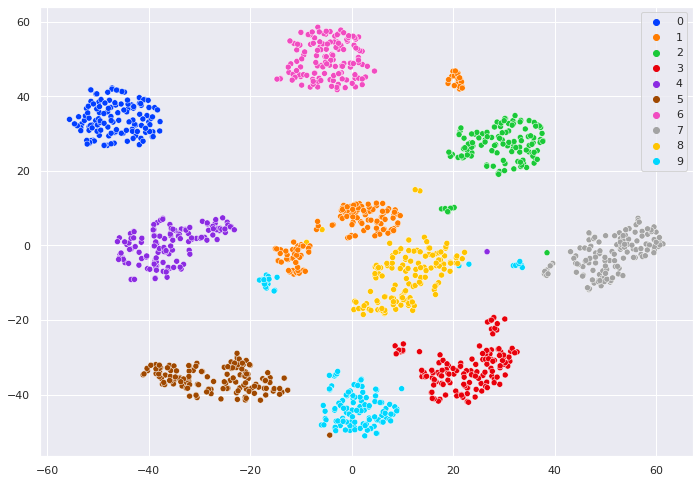

Tiempo que tarda en entrenar el modelo: -0.0 s
Accuracy con tsne: 96.67


In [ ]:
X, y = load_digits(return_X_y=True)

tsne = TSNE()

t0 = time()
tsned_images = tsne.fit_transform(X)
t1 = time()
print('Tiempo que tarda en convertir los datos: {} s'.format(round(t1-t0,2)))

# tsned_train y test, por ser un manifold, deberia de ser dimension 2 (al ser una representacion de un grafo)
dt = DecisionTreeClassifier(random_state=seed)

X_train, X_test, y_train, y_test = train_test_split(tsned_images, y, random_state=seed)

sns.scatterplot(X_train[:,0], X_train[:,1], hue=y_train, legend='full', palette=palette)
plt.show()

t2 = time()
dt.fit(X_train, y_train)
t3 = time()

print('Tiempo que tarda en entrenar el modelo: {} s'.format(round(t2-t3,2)))

resultado_con_tsne = dt.predict(X_test)

print('Accuracy con tsne: {}'.format(round(accuracy_score(y_test, resultado_con_tsne) * 100, 2)))

## Mejora a t-SNE

Usando t-SNE, no solo tarde un tiempo mucho mayor, sino que el resultado obtenido es considerablemente peor.

Utilizando como guia: https://www.kaggle.com/carlolepelaars/97-on-mnist-with-a-single-decision-tree-t-sne

Previo a realizar el t-SNE, reduzco la dimensionalidad por medio de Truncated Singular Value Decomposition (TSVD).

Tiempo que tarda convertir los datos con tsvd: 0.18 s
Tiempo que tarda convertir los datos de tsvd con tsne: 17.71 s
Scatterplot de imagenes despues de la corrida tsvd y tsne


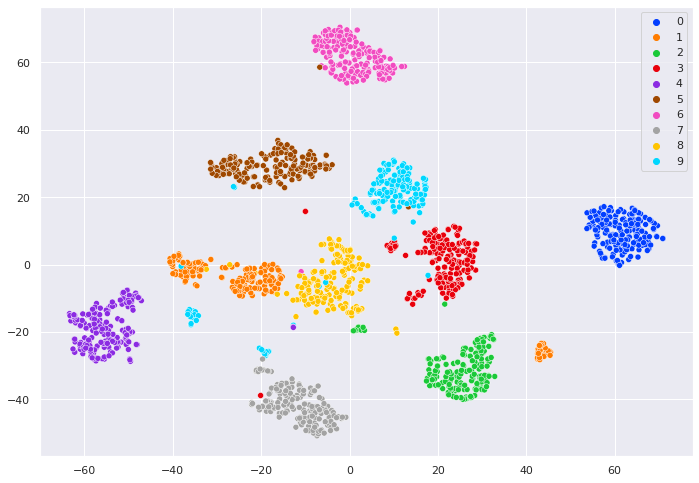

Tiempo que tarda en entrenar el modelo: 0.0 s
Accuracy con tsvd y tsne: 96.44


In [ ]:
X, y = load_digits(return_X_y=True)

t0 = time()
tsvd_images = TruncatedSVD(n_components=50).fit_transform(X)
t1 = time()
print('Tiempo que tarda convertir los datos con tsvd: {} s'.format(round(t1-t0,2)))

tsne = TSNE()

t2 = time()
tsvd_tsne_images = tsne.fit_transform(tsvd_images)
t3 = time()
print('Tiempo que tarda convertir los datos de tsvd con tsne: {} s'.format(round(t3-t2,2)))

print('Scatterplot de imagenes despues de la corrida tsvd y tsne')
sns.scatterplot(tsvd_tsne_images[:,0], tsvd_tsne_images[:,1], hue=y, legend='full', palette=palette)

plt.show()

dt = DecisionTreeClassifier(random_state=seed)

X_train, X_test, y_train, y_test = train_test_split(tsvd_tsne_images, y, random_state=seed)

t4 = time()
dt.fit(X_train, y_train)
t5 = time()

print('Tiempo que tarda en entrenar el modelo: {} s'.format(round(t5-t4,2)))

resultado_con_tsne = dt.predict(X_test)

print('Accuracy con tsvd y tsne: {}'.format(round(accuracy_score(y_test, resultado_con_tsne) * 100, 2)))